https://machinelearningmastery.com/semi-supervised-learning-with-label-spreading/

https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html

https://blockgeni.com/understanding-semi-supervised-learning-with-label-spreading/

https://aicorespot.io/semi-supervised-learning-with-label-spreading/

# Import Library

In [1]:
# Load, explore and plot data
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# %matplotlib inline
# Train test split
from sklearn.model_selection import train_test_split
# Text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

# Modeling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout, GlobalAveragePooling1D, Flatten, SpatialDropout1D, Bidirectional
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.semi_supervised import LabelSpreading
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

import joblib

2024-09-20 11:56:24.803801: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Import Notebook

In [2]:
# %run notebook_functions.ipynb
%run notebook_model_ls.ipynb
%run notebook_model_lstm_.ipynb


# ASRS

sample_size= (5000, 4)
           HFACS_Category_Value  Count
0          Adverse Mental State    509
1   Adverse Physiological State      5
2      Crew Resource Management    301
3               Decision Errors    185
4        Organizational Climate     78
5        Organizational Process    454
6             Perceptual Errors     79
7          Physical Environment    405
8           Resource Management     27
9            Skill-based Errors    151
10    Technological Environment   2536
11                     Unmapped    270
Shape of label tensor: (4988,)
Accuracy on test data: 0.9936575052854123


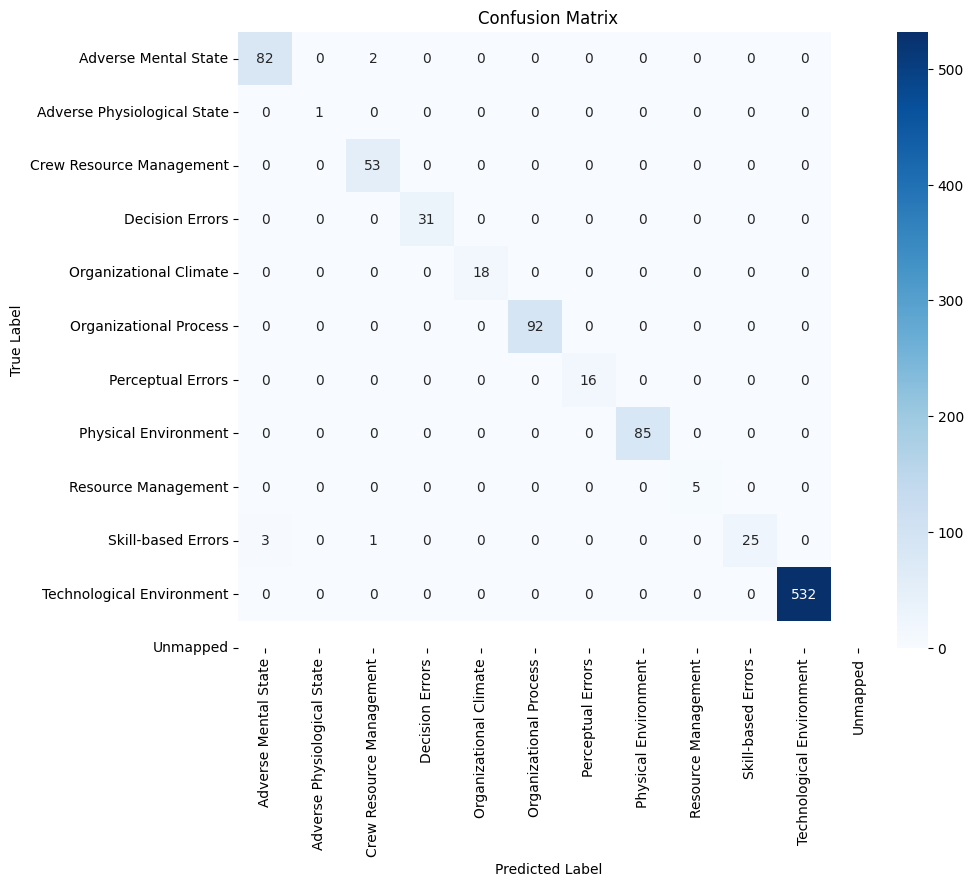

asrs Model and vectorizer saved successfully
Model and vectorizer loaded successfully


,event_id,finding_description,narrative_01,narrative_02,HFACS_Category_Value_Predict
109996,1800830,ATC Equipment / Nav Facility / Buildings,Aircraft X landed and while taxiing to parking...,NaN,Technological Environment
121580,2021216,Ambiguous,On Day 0 at approximately XA:29 pilot climbed ...,NaN,Technological Environment
186046,1777197,Procedure,Just a little confusion on my part. I was clea...,NaN,Organizational Process
208762,1714400,Company Policy,To be clear I did not have a lot going on and ...,NaN,Organizational Climate
208763,1714553,Environment - Non Weather Related,While descending into PIB out of 14;000 ft. MS...,NaN,Physical Environment
...,...,...,...,...,...
228386,2073169,Human Factors:Training / Qualification:Airspac...,I recently filmed some drone footage at sunset...,NaN,Skill-based Errors
228391,2073637,Company Policy,I am submitting this report for informational ...,NaN,Organizational Climate
228392,2074640,Ambiguous,On the night of Day 0 the fire district was re...,NaN,Technological Environment
228393,2074779,Human Factors:Communication Breakdown; Situati...,I was on break when this occurred and is my un...,NaN,Crew Resource Management


In [3]:
# 01. Get Data
asrs_df = CoreUtils.get_data('asrs')

# 02. Label Spreading
asrs_modelLS = ModelLS('asrs', 5000)
asrs_modelLS.train()

# 03. Apply it new data get predicting label
asrs_predicted_data = asrs_modelLS.predict(asrs_df, 25000)

# model_data = labeled_data[labeled_data['HFACS_Category_Value_Predict'] != 'Unmapped'].copy()

# 05. Show Label distribution
# show_label(asrs_predicted_data, 'HFACS_Category_Value_Predict')
asrs_predicted_data

In [3]:
asrs_lstm_Model = LSTMModel(None, ds_name='asrs', sample_size=500)
asrs_lstm_Model.train()
asrs_lstm_Model.evaluate()
# lstm_Model.
# lstm_Model.tra

The DataFrame is None
['asrs']
Data loaded
start labelling


AttributeError: 'dict' object has no attribute 'split'

# NTSB

sample_size= (5000, 4)
           HFACS_Category_Value  Count
0          Adverse Mental State    173
1   Adverse Physiological State     21
2               Decision Errors    470
3        Organizational Process     21
4             Perceptual Errors     42
5            Personal Readiness     62
6          Physical Environment    393
7          Physical Limitations      6
8            Routine Violations      2
9            Skill-based Errors   1001
10    Technological Environment    287
11                     Unmapped   2522
Shape of label tensor: (4258,)
4258
Accuracy on test data: 1.0


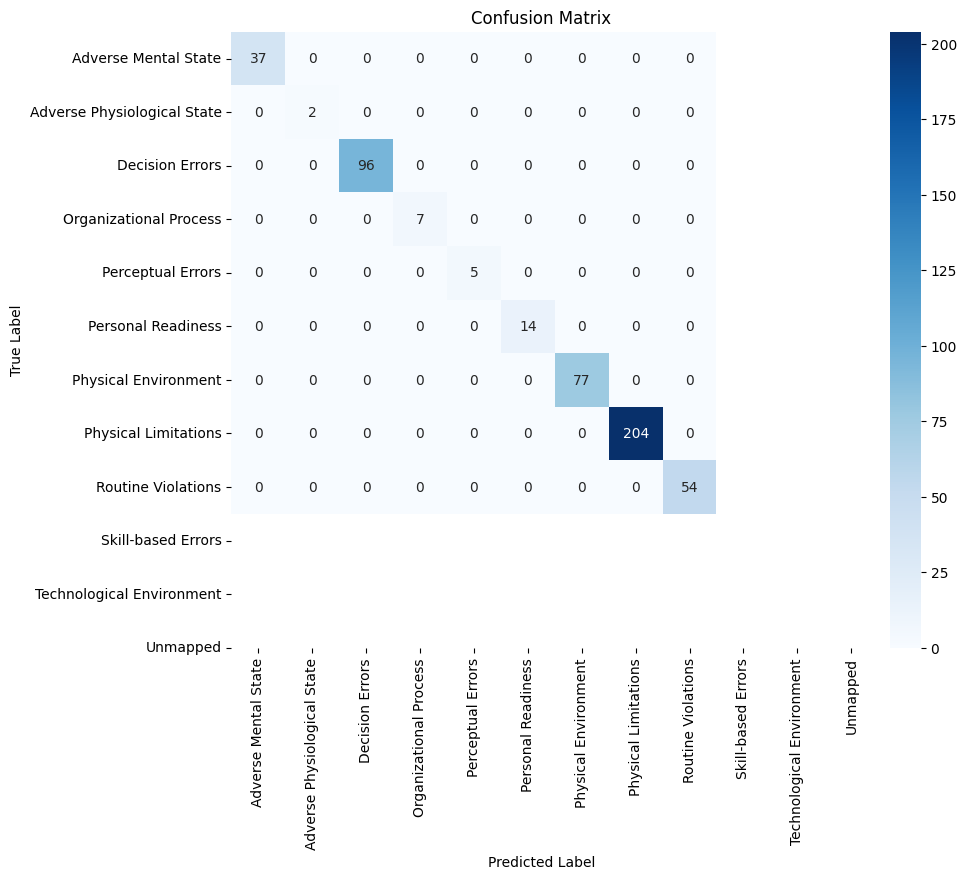

ntsb Model and vectorizer saved successfully
Model and vectorizer loaded successfully


,event_id,finding_description,narrative_01,narrative_02,HFACS_Category_Value_Predict
57298,20200102X54844,Aircraft-Fluids/misc hardware-Fluids-Fuel-Flui...,"The pilot reported that, during a night flight...",NaN,Technological Environment
57299,20200102X54844,Personnel issues-Task performance-Planning/pre...,"The pilot reported that, during a night flight...",NaN,Skill-based Errors
57300,20200101X91024,Personnel issues-Task performance-Inspection-P...,"HISTORY OF FLIGHTOn January 1, 2020, about 154...",NaN,Skill-based Errors
57301,20200101X91024,Personnel issues-Task performance-Planning/pre...,"HISTORY OF FLIGHTOn January 1, 2020, about 154...",NaN,Skill-based Errors
57302,20200101X91024,Personnel issues-Action/decision-Info processi...,"HISTORY OF FLIGHTOn January 1, 2020, about 154...",NaN,Decision Errors
...,...,...,...,...,...
71812,20240131193727,Environmental issues-Physical environment-Runw...,NaN,NaN,Physical Environment
71816,20240201193735,Personnel issues-Task performance-Use of equip...,NaN,NaN,Skill-based Errors
71817,20240201193735,Aircraft-Aircraft oper/perf/capability-Perform...,NaN,NaN,Technological Environment
71818,20240201193735,Environmental issues-Conditions/weather/phenom...,NaN,NaN,Physical Environment


In [6]:
# 01. Get Data
ntsb_df = CoreUtils.get_data('ntsb')

ntsb_modelLS = ModelLS('ntsb', 5000)
ntsb_modelLS.train()

# 04. Apply it new data get predicting label
ntsb_predicted_data = ntsb_modelLS.predict(ntsb_df, 25000)

# model_data = labeled_data[labeled_data['HFACS_Category_Value_Predict'] != 'Unmapped'].copy()

# 05. Show Lablel distribution
# show_label(ntsb_predicted_data, 'HFACS_Category_Value_Predict')
# ntsb_predicted_data.to_csv('data_ntsb_sample_with_label.csv')
ntsb_predicted_data

In [59]:
ntsb_lstm_Model = LSTMModel(ds_name='ntsb', sample_size=5000)
ntsb_lstm_Model.train()
ntsb_lstm_Model.evaluate()

['ntsb']
Data loaded
start labelling
sample_size= (500, 4)
           HFACS_Category_Value  Count
0          Adverse Mental State     17
1   Adverse Physiological State      1
2               Decision Errors     47
3        Organizational Process      4
4             Perceptual Errors      3
5            Personal Readiness      2
6          Physical Environment     36
7          Physical Limitations      1
8            Skill-based Errors     93
9     Technological Environment     36
10                     Unmapped    260
Shape of label tensor: (430,)
Model and vectorizer loaded successfully
Sampling size (3813, 5)
start pre_process_df
combined_narrative
counting_narrative
clean_narrative
clean_feature
drop_narratives
preprocess_narrative


/var/folders/__/wffwy8dx6l53rqlg01sth6th0000gn/T/ipykernel_53874/2983950930.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=[feature_name], inplace=True)


event_id                        0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
             event_id                                finding_description  \
66723  20220711105438  Not determined-Not determined-(general)-(gener...   
66724  20220711105439  Aircraft-Aircraft power plant-Engine (turbine/...   
66725  20220711105439  Aircraft-Aircraft oper/perf/capability-Perform...   
66726  20220711105439  Aircraft-Aircraft oper/perf/capability-Perform...   
66727  20220711105439  Environmental issues-Physical environment-Terr...   

      HFACS_Category_Value_Predict  \
66723              Decision Errors   
66724    Technological Environment   
66725    Technological Environment   
66726    Technological Environment   
66727         Physical Environment   

                                               narrative  narra

/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/AviationSafetyAnalysisModel/python_modules/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


27/27 ━━━━━━━━━━━━━━━━━━━━ 18s 207ms/step - accuracy: 0.2231 - loss: 2.4116 - val_accuracy: 0.4947 - val_loss: 2.3913
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 193ms/step - accuracy: 0.4348 - loss: 2.3861 - val_accuracy: 0.4947 - val_loss: 2.3356
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 283ms/step - accuracy: 0.4570 - loss: 2.3010 - val_accuracy: 0.4947 - val_loss: 1.9476
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 283ms/step - accuracy: 0.4931 - loss: 1.8505 - val_accuracy: 0.4947 - val_loss: 1.5530
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 259ms/step - accuracy: 0.4723 - loss: 1.6506 - val_accuracy: 0.4947 - val_loss: 1.5029
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - accuracy: 0.4744 - loss: 1.5609 - val_accuracy: 0.4947 - val_loss: 1.4961
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 270ms/step - accuracy: 0.4650 - loss: 1.5915 - val_accuracy: 0.4947 - val_loss: 1.4963
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 314ms/step - accuracy: 0.4925 - loss: 1.5427 - val_accuracy: 0.4947 - val

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step
Accuracy: 0.4000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00         1
           6       0.00      0.00      0.00        12
           9       0.00      0.00      0.00        30
          10       0.40      1.00      0.57        42

    accuracy                           0.40       105
   macro avg       0.06      0.14      0.08       105
weighted avg       0.16      0.40      0.23       105



/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/AviationSafetyAnalysisModel/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/AviationSafetyAnalysisModel/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/AviationSafetyAnalysisModel/python_module

# ASRS & NTSB (Combination)

sample_size= (5000, 4)
           HFACS_Category_Value  Count
0          Adverse Mental State    509
1   Adverse Physiological State      5
2      Crew Resource Management    301
3               Decision Errors    185
4        Organizational Climate     78
5        Organizational Process    454
6             Perceptual Errors     79
7          Physical Environment    405
8           Resource Management     27
9            Skill-based Errors    151
10    Technological Environment   2536
11                     Unmapped    270
sample_size= (5000, 4)
           HFACS_Category_Value  Count
0          Adverse Mental State    173
1   Adverse Physiological State     21
2               Decision Errors    470
3        Organizational Process     21
4             Perceptual Errors     42
5            Personal Readiness     62
6          Physical Environment    393
7          Physical Limitations      6
8            Routine Violations      2
9            Skill-based Errors   1001
10    Technologica

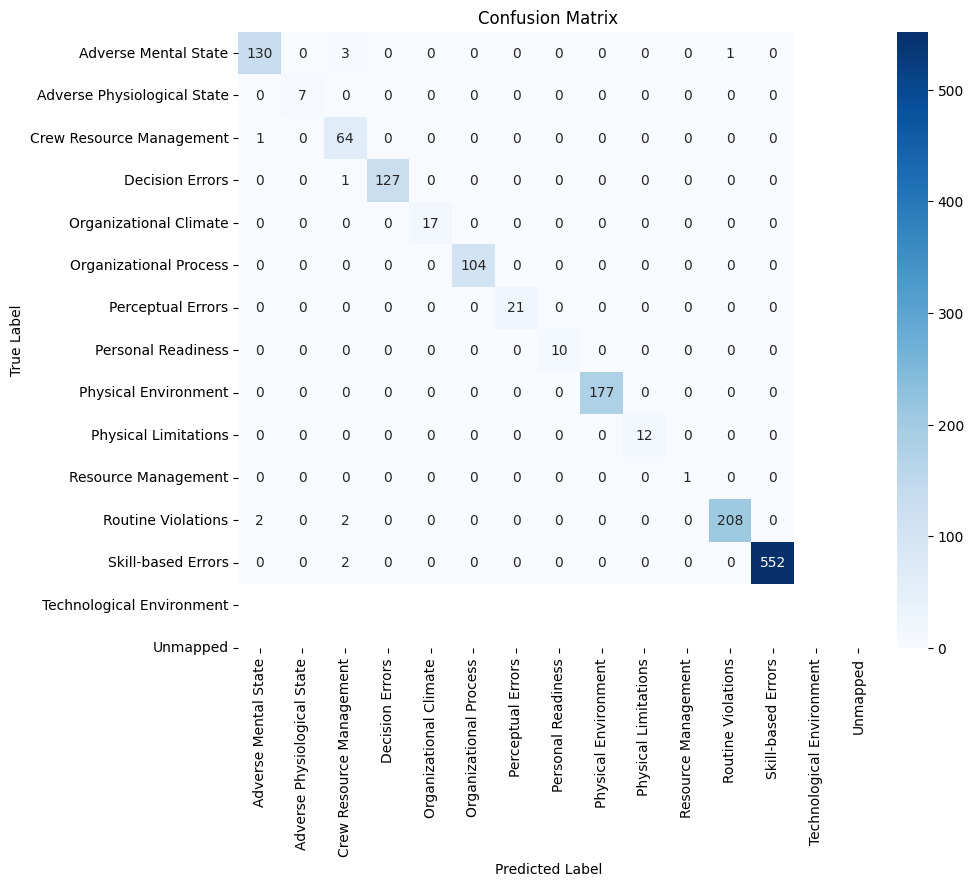

asrs_ntsb Model and vectorizer saved successfully
Model and vectorizer loaded successfully


/var/folders/__/wffwy8dx6l53rqlg01sth6th0000gn/T/ipykernel_53874/44665793.py:208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_data['HFACS_Category_Value_Predict'] = y_decoded


,event_id,finding_description,narrative_01,narrative_02,HFACS_Category_Value_Predict
1,1775153,Human Factors:Distraction; Confusion; Training...,Training on combined sectors; moderate traffic...,Recertification time on [positions] (departure...,Adverse Mental State
2,1775193,Procedure:Fuel Tank:Malfunctioning:Aircraft Eq...,Planned flight as normal; no limiting MELs wer...,NaN,Technological Environment
3,1775196,Airport,Upon arrival into the terminal environment at ...,NaN,Physical Environment
4,1775198,Aircraft:Elevator Trim System:Malfunctioning:A...,During takeoff; received master warning indica...,NaN,Technological Environment
5,1775208,Staffing:Compressor Stator/Vane:Malfunctioning...,XA55z We arrived planeside.XB12z Approximately...,NaN,Technological Environment
...,...,...,...,...,...
29302,20240131193727,Environmental issues-Physical environment-Runw...,NaN,NaN,Physical Environment
29303,20240201193735,Personnel issues-Task performance-Use of equip...,NaN,NaN,Skill-based Errors
29304,20240201193735,Aircraft-Aircraft oper/perf/capability-Perform...,NaN,NaN,Technological Environment
29305,20240201193735,Environmental issues-Conditions/weather/phenom...,NaN,NaN,Physical Environment


In [8]:
# 01. Manual Labeling with specific sample
asrs_ntsb_modelLS = ModelLS('asrs_ntsb', 5000)
asrs_ntsb_modelLS.train()


asrs_df_tail = asrs_df.tail(15000)
ntsb_df_tail = ntsb_df.tail(15000)
asrs_ntsb_df_tail = pd.concat([asrs_df_tail, ntsb_df_tail], axis=0).reset_index(drop=True)
# asrs_ntsb_df_tail.isnull().sum()

# 04. Apply it new data get predicting label
# ntsb_predicted_data = predict_LS(asrs_ntsb_df_tail, 'asrs_ntsb')
asrs_ntsb_predicted_data = asrs_ntsb_modelLS.predict(asrs_ntsb_df_tail)

# # model_data = labeled_data[labeled_data['HFACS_Category_Value_Predict'] != 'Unmapped'].copy()

# 05. Show Lablel distribution
# show_label(ntsb_predicted_data, 'HFACS_Category_Value_Predict')
# # ntsb_predicted_data.to_csv('data_ntsb_sample_with_label.csv')
asrs_ntsb_predicted_data

In [ ]:
asrs_ntsb_lstm_Model = LSTMModel(ds_name='asrs_ntsb', sample_size=1000)
asrs_ntsb_lstm_Model.train()
asrs_ntsb_lstm_Model.evaluate()